# Cross-resonance gate
Gengyan Zhang, June 9 2016

To run the notebook locally, place the data files (\*.dat) in the same folder. The notebook only **visualizes** the simulation results. To do real simulation, run [CRGate.py](./CRGate.py).
## Reference
- [Fully microwave-tunable universal gates in superconducting qubits with linear couplings and fixed transition frequencies](http://journals.aps.org/prb/abstract/10.1103/PhysRevB.81.134507)
- [Simple All-Microwave Entangling Gate for Fixed-Frequency Superconducting Qubits](http://journals.aps.org/prl/abstract/10.1103/PhysRevLett.107.080502)
- [Process verification of two-qubit quantum gates by randomized benchmarking](http://journals.aps.org/pra/abstract/10.1103/PhysRevA.87.030301)
- [Demonstration of weight-four parity measurements in the surface code architecture](https://arxiv.org/abs/1605.01351v1)

## Derivation
The cross-resonance (CR) gate is a two-qubit operation that drives the control qubit (qubit 1) at the frequency of the target qubit (qubit 2).

Denoting qubit frequencies by $\omega_{1,2}$, their static coupling by $J$, and drive strength by $\Omega$, where $J, \Omega\ll|\Delta|=|\omega_1-\omega_2|$, we can write the Hamiltonian
$$H = \frac{1}{2}\omega_1\sigma_1^z + \frac{1}{2}\omega_2\sigma_2^z+J\sigma_1^x\sigma_2^x+\Omega[\sigma_1^+\exp(-\text{i}\omega_2 t)+\sigma_1^-\exp(\text{i}\omega_2t)].$$
In the frame rotating at $\omega_2$, we have
$$H_I = \frac{1}{2}\Delta\sigma_1^z+J(\sigma_1^+\sigma_2^-+\sigma_1^-\sigma_2^+)+\Omega\sigma_1^x.$$
Treating the last three terms as perturbation, i.e.,  $H_0=\frac{1}{2}\Delta\sigma_1^z$, $\lambda V = J(\sigma_1^+\sigma_2^-+\sigma_1^-\sigma_2^+)+\Omega\sigma_1^x$, and using the general formula for an effective Hamiltonian (to second order, c.f. C. Cohen-Tannoudji, J. Dupont-Roc, and G. Grynberg, *Atom-Photon Interactions: Basic Processes and Applications*, Complement B-I)
$$\langle i|H_\text{eff}^\alpha|j\rangle = E_{i\alpha}\delta_{ij}+\langle i,\alpha|\lambda V|j,\alpha\rangle
+\frac{1}{2}\sum_{k,\gamma\neq\alpha}\langle i,\alpha|\lambda V|k,\gamma\rangle\langle k,\gamma|\lambda V|j,\alpha\rangle\left(\frac{1}{E_{i\alpha}-E_{k\gamma}}+\frac{1}{E_{j\alpha}-E_{k\gamma}}\right),$$
we obtain the approximate Hamiltonian in $\{|00\rangle, |10\rangle, |01\rangle, |11\rangle\}$ basis
$$H_\text{eff}=\begin{pmatrix}
-\frac{\Delta}{2}-\frac{\Omega^2}{\Delta} & \Omega & -\frac{J}{\Delta}\Omega & 0\\
\Omega & \frac{\Delta}{2}+\frac{J^2}{\Delta}+\frac{\Omega^2}{\Delta} & 0 & \frac{J}{\Delta}\Omega\\
-\frac{J}{\Delta}\Omega & 0 & -\frac{\Delta}{2}-\frac{J^2}{\Delta}-\frac{\Omega^2}{\Delta} & \Omega\\
0 & \frac{J}{\Delta}\Omega & \Omega & \frac{\Delta}{2}+\frac{\Omega^2}{\Delta}
\end{pmatrix}.$$
In other words, the dressed qubit frequencies are $\tilde{\omega}_1=\omega_1+\frac{J^2}{\Delta}+\frac{2\Omega^2}{\Delta}, \tilde{\omega}_2=\omega_2-\frac{J^2}{\Delta}$, where $\pm\frac{J^2}{\Delta}$ is the dressing from the $J$ coupling and $\frac{2\Omega^2}{\Delta}$ is the **off-resonant ac-Stark shift**. The drive term becomes $\Omega\sigma_1^x+\frac{J}{\Delta}\Omega\sigma_1^z\sigma_2^x$, the last term being an X gate on qubit 2 conditioned on the state of qubit 1.

CNOT = $\frac{Z_1+I_1}{2}\cdot X_2\propto Z_1X_2+I_1X_2$ can then be implemented by CR gate and single qubit operation.

## Off-resonant ac-Stark shift
This term is calculated using pertubation method. Another way to see this effect is to recall that a two-level system driven by a classical drive with strength $\Omega$ and detuning $\Delta$ will undergo Rabi oscillation at frequency $\sqrt{(2\Omega)^2+\Delta^2}$, so the frequency shift (when $\Delta\gg\Omega$) is
$$\sqrt{(2\Omega)^2+\Delta^2}-\Delta\approx\Delta\left(1+\frac{1}{2}\frac{4\Omega^2}{\Delta^2}\right)-\Delta=\frac{2\Omega^2}{\Delta}$$

## Higher energy levels
Ref: [Flux-tunable superconducting transmons for quantum information processing](http://surface.syr.edu/etd/249/), section 4.3.

Including higher energy levels, the Hamiltonian becomes
$$H_I = \Delta a_1^\dagger a_1-\frac{\alpha_1}{2}a_1^\dagger a_1^\dagger a_1 a_1 -\frac{\alpha_2}{2}a_2^\dagger a_2^\dagger a_2 a_2+J(a_1^\dagger a_2+a_1 a_2^\dagger)+\Omega(a_1^\dagger + a_1),$$
and the effective Hamiltonian is
$$H_\text{eff}=\begin{pmatrix}
-\frac{\Omega^2}{\Delta} & \Omega & -\frac{J}{\Delta}\Omega & 0\\
\Omega & \Delta+\frac{J^2}{\Delta}+\frac{\Omega^2}{\Delta} & 0 & \left(\frac{J}{\Delta}-\frac{2J}{\Delta-\alpha_1}\right)\Omega\\
-\frac{J}{\Delta}\Omega & 0 & -\frac{J^2}{\Delta}-\frac{\Omega^2}{\Delta} & \Omega\\
0 & \left(\frac{J}{\Delta}-\frac{2J}{\Delta-\alpha_1}\right)\Omega & \Omega & \Delta-\frac{2J^2(\alpha_1+\alpha_2)}{(\Delta-\alpha_1)(\Delta+\alpha_2)}+\frac{\Omega^2}{\Delta}
\end{pmatrix}.$$
Comparing the off-diagonal elements $H_{00, 01}$ and $H_{10, 11}$, we see that the two-qubit gate has an enhancement if qubit 1 is in the straddling regime of qubit 2 ($0<\alpha_1<\Delta$).

## Echoed CR gate
Ref: [Process verification of two-qubit quantum gates by randomized benchmarking](http://journals.aps.org/pra/abstract/10.1103/PhysRevA.87.030301)

The driving Hamiltonian of a cross-resonance gate is
$$H_D=\Omega(t)(mI_1X_2-\mu Z_1X_2+\eta Z_1I_2),$$
where $m$ represents the effect of **spurious electromagnetic crosstalk** between both qubits as well as the effect of higher energy levels, $\mu$ determines the rate of two-qubit gate, and $\eta$ represents the off-resonant Stark shift of qubit 1.

The two-qubit coupling rate $\frac{J}{\Delta}\Omega$ and spurious drive $m\Omega$ depend on the phase of the drive, but the Start shift $\frac{2\Omega^2}{\Delta}$ only depends on the amplitude of the drive. Therefore, if the CR pulse is divided into two equal parts of opposite sign and a $\pi$ rotation of qubit 1 in the middle, both $I_1 X_2$ and $Z_1 I_2$ terms can be **echoed away**.

## QuTiP simulation
Parameters (omitting $2\pi$ factors): $\Delta$ = 100 MHz, $J$ = 7 MHz, $\Omega$ = 20 MHz, $m$ = 0.2.

The above pertubative calculation predicts two-qubit coupling rate $\frac{J}{\Delta}\Omega$ = 1.4 MHz, ac-Stark shift rate $\frac{2\Omega^2}{\Delta}$ = 8 MHz.

In [12]:
%matplotlib inline
from IPython.display import set_matplotlib_formats, Image
set_matplotlib_formats('png', 'pdf')
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt

### Simple CR gate ($|\psi_0\rangle = |0_10_2\rangle$ or $|1_10_2\rangle$)

In [13]:
data = qt.file_data_read('CR0.dat')

tlist = data[0, :]
sy2_down = data[5, :]
sz2_down = data[6, :]
sy2_up = data[11, :]
sz2_up = data[12, :]

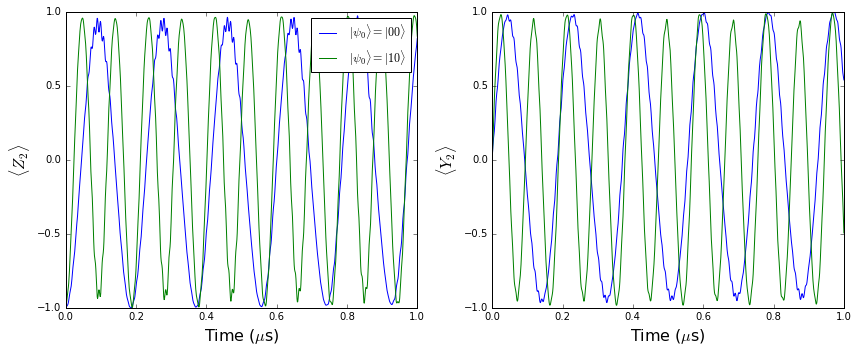

In [14]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(tlist, sz2_down, tlist, sz2_up)
plt.xlabel(r'Time ($\mu$s)', fontsize=16)
plt.ylabel(r'$\langle Z_2\rangle$', fontsize=16)
plt.legend([r'$|\psi_0\rangle=|00\rangle$', r'$|\psi_0\rangle=|10\rangle$'])

plt.subplot(122)
plt.plot(tlist, sy2_down, tlist, sy2_up)
plt.xlabel(r'Time ($\mu$s)', fontsize=16)
plt.ylabel(r'$\langle Y_2\rangle$', fontsize=16)

plt.tight_layout()

The conditioned rotation $Z_1X_2$ is on top of the spurious drive $mI_1X_2$.

### Echoed CR gate ($|\psi_0\rangle=|0_10_2\rangle$ or $|1_10_2\rangle$)

In [15]:
data = qt.file_data_read('CR2.dat')

tlist = data[0, :]
sy2_down = data[5, :]
sz2_down = data[6, :]
sy2_up = data[11, :]
sz2_up = data[12, :]

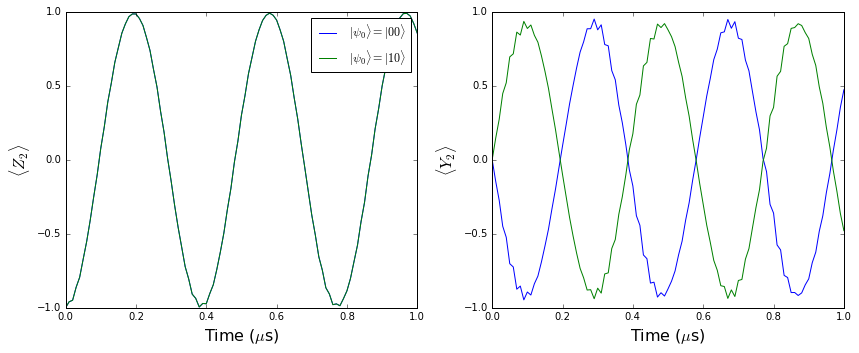

In [16]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(tlist, sz2_down, tlist, sz2_up)
plt.xlabel(r'Time ($\mu$s)', fontsize=16)
plt.ylabel(r'$\langle Z_2\rangle$', fontsize=16)
plt.legend([r'$|\psi_0\rangle=|00\rangle$', r'$|\psi_0\rangle=|10\rangle$'])

plt.subplot(122)
plt.plot(tlist, sy2_down, tlist, sy2_up)
plt.xlabel(r'Time ($\mu$s)', fontsize=16)
plt.ylabel(r'$\langle Y_2\rangle$', fontsize=16)

plt.tight_layout()

The spurious drive $mI_1X_2$ is echoed away and only the $Z_1X_2$ term remains.  
The above results are similar to the figure in the reference [Process verification of two-qubit quantum gates by randomized benchmarking](http://journals.aps.org/pra/abstract/10.1103/PhysRevA.87.030301)

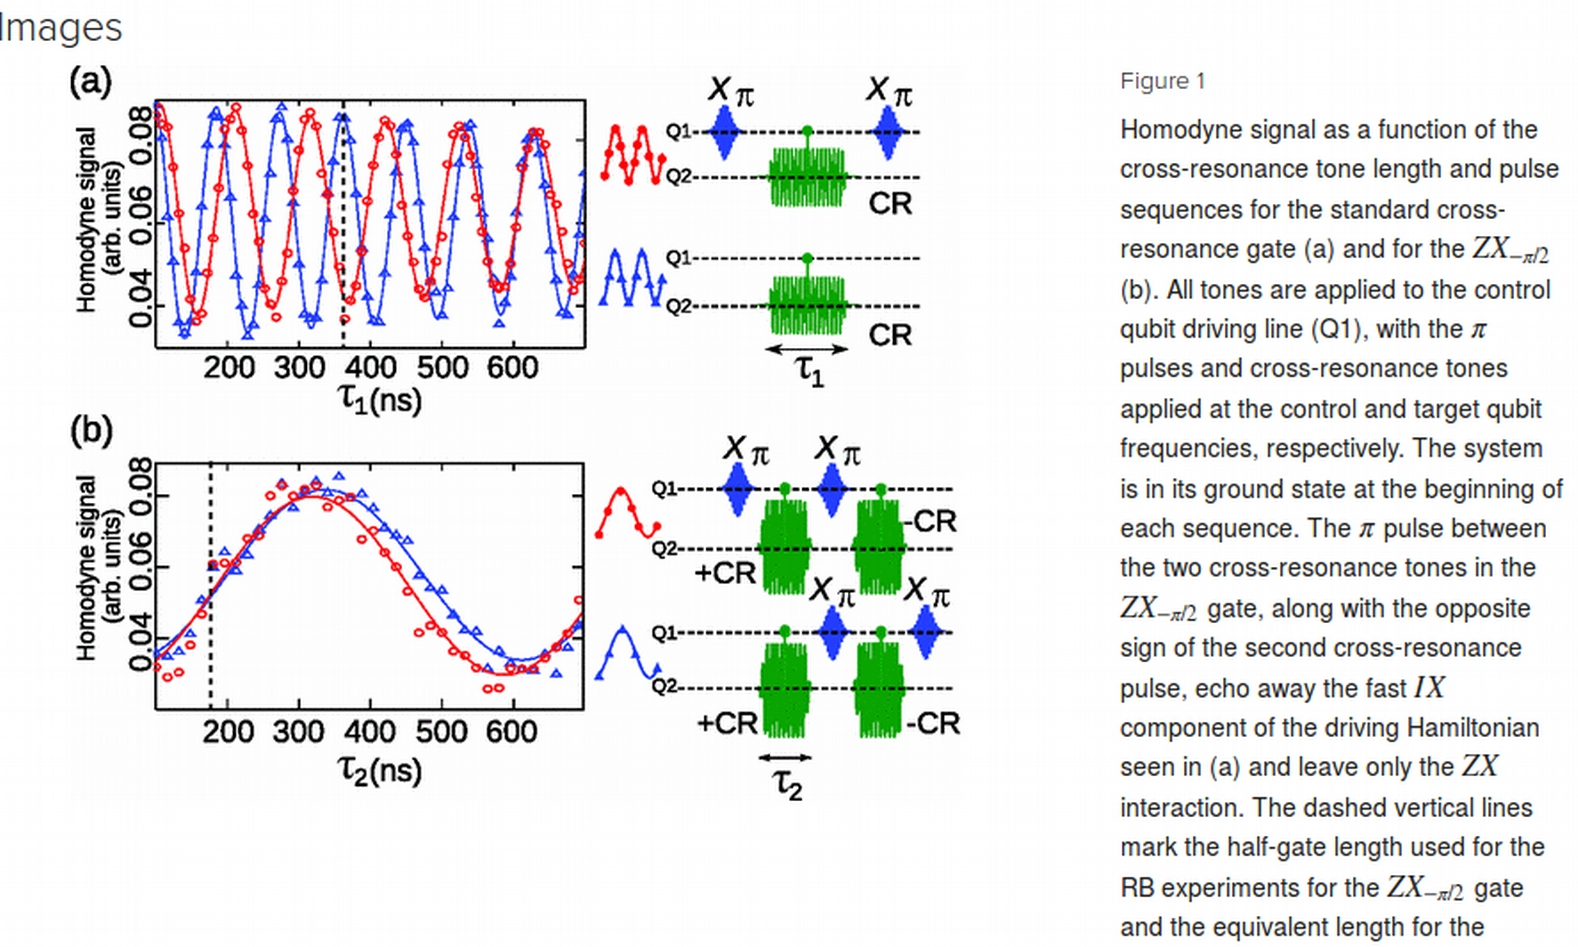

In [17]:
Image('./Screenshot_PhysRevA.87.030301.jpg', width=800)

### Phase shift on qubit 1 ($|\psi_0\rangle=\frac{(|0_1\rangle+|1_1\rangle)}{\sqrt{2}}\otimes|0_2\rangle$)

In [18]:
data = qt.file_data_read('CR0_PhaseShift.dat')
tlist_simple = data[0, :]
sx1_simple = data[1, :]
sy1_simple = data[2, :]

data = qt.file_data_read('CR2_PhaseShift.dat')
tlist_echo = data[0, :]
sx1_echo = data[1, :]
sy1_echo = data[2, :]

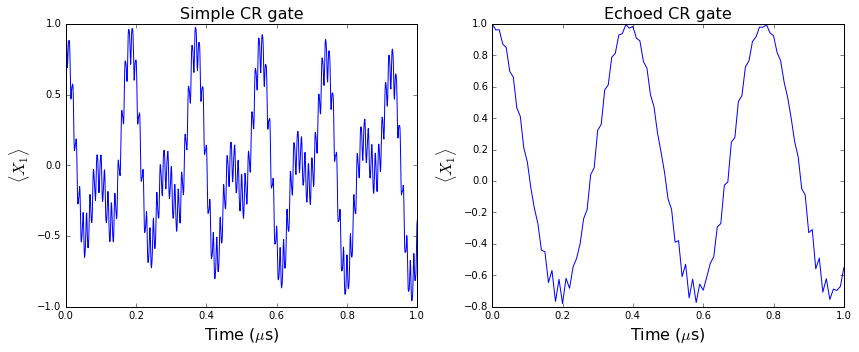

In [19]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(tlist_simple, sx1_simple)
plt.xlabel(r'Time ($\mu$s)', fontsize=16)
plt.ylabel(r'$\langle X_1\rangle$', fontsize=16)
plt.title('Simple CR gate', fontsize=16)

plt.subplot(122)
plt.plot(tlist_echo, sx1_echo)
plt.xlabel(r'Time ($\mu$s)', fontsize=16)
plt.ylabel(r'$\langle X_1\rangle$', fontsize=16)
plt.title('Echoed CR gate', fontsize=16)
plt.tight_layout()

Without echo, qubit 1 shows ac-Stark phase shift; with echo, only the $Z_1X_2$ term remains.

### J = 0 case

In [20]:
data = qt.file_data_read('CR0_zeroJ.dat')
tlist_simple = data[0, :]
sx1_simple = data[1, :]
sy1_simple = data[2, :]

data = qt.file_data_read('CR2_zeroJ.dat')
tlist_echo = data[0, :]
sx1_echo = data[1, :]
sy1_echo = data[2, :]

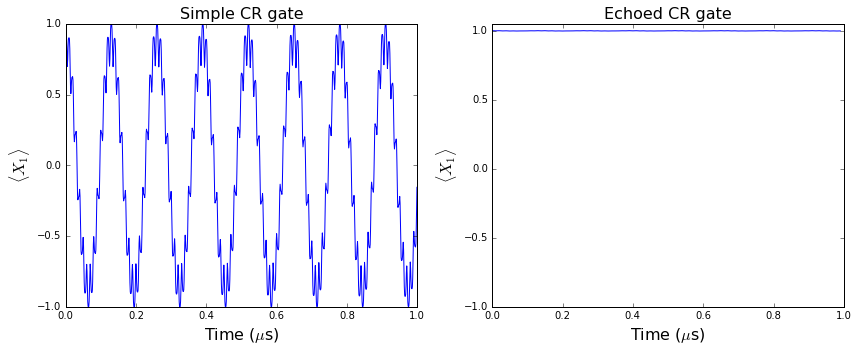

In [21]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(tlist_simple, sx1_simple)
plt.xlabel(r'Time ($\mu$s)', fontsize=16)
plt.ylabel(r'$\langle X_1\rangle$', fontsize=16)
plt.title('Simple CR gate', fontsize=16)

plt.subplot(122)
plt.plot(tlist_echo, sx1_echo)
plt.ylim(-1, 1.05)
plt.xlabel(r'Time ($\mu$s)', fontsize=16)
plt.ylabel(r'$\langle X_1\rangle$', fontsize=16)
plt.title('Echoed CR gate', fontsize=16)
plt.tight_layout()

Even when $J=0$, without echo qubit 1 shows phase shift at a rate $\sim$ 8 MHz because of the off-resonant drive.  
That’s why in [Demonstration of weight-four parity measurements in the surface code architecture](https://arxiv.org/abs/1605.01351v1) echo pulses need to be applied to each spectator qubit.

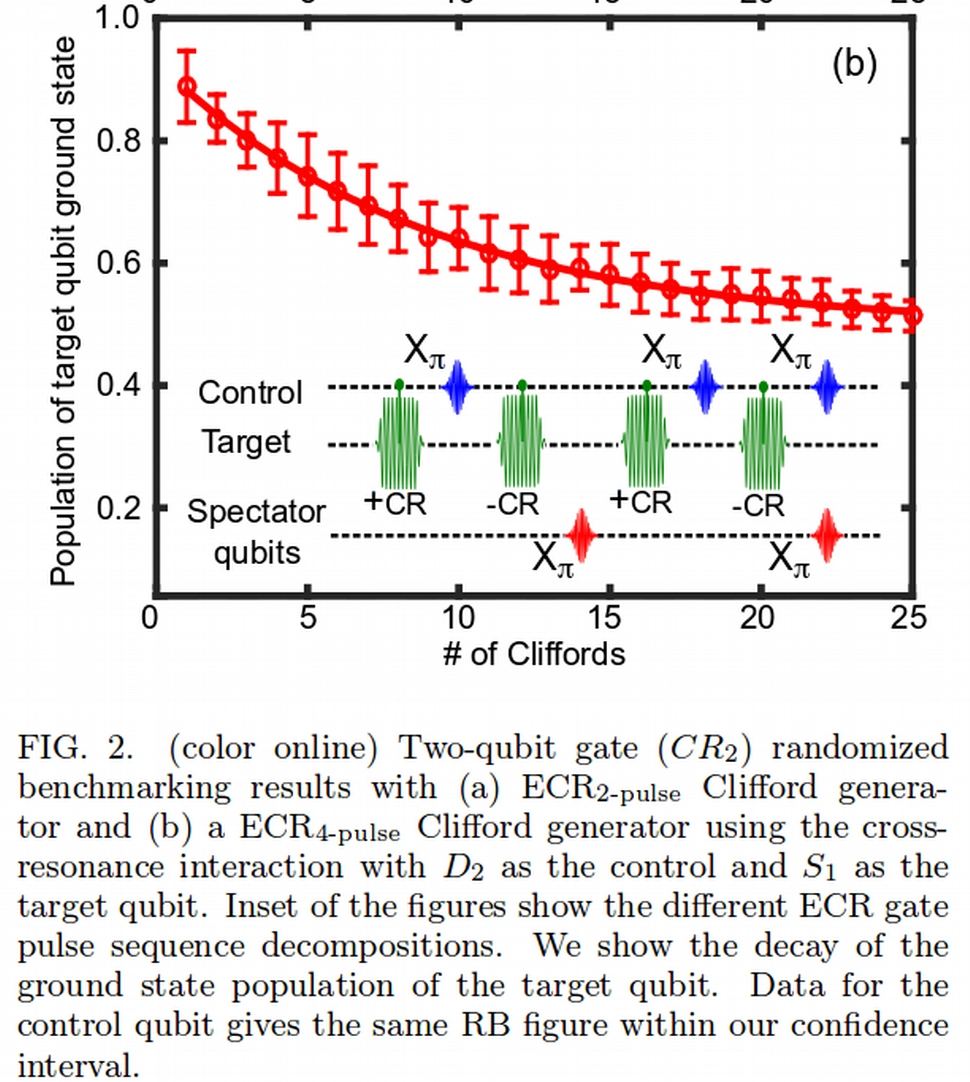

In [22]:
Image('./Screenshot_arxiv1605.01351.jpg', width=500)

In [23]:
from qutip.ipynbtools import version_table
version_table()

Software,Version
QuTiP,3.2.0.dev-c209b67
Numpy,1.11.0
SciPy,0.17.1
matplotlib,1.5.1
Cython,0.24
Number of CPUs,4
BLAS Info,INTEL MKL
IPython,5.0.0b3
Python,"3.5.1 |Anaconda 2.5.0 (64-bit)| (default, Dec 7 2015, 11:16:01) [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]"
OS,posix [linux]
